In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.style.use('bmh')

In [59]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [4]:
cat_cols = train.select_dtypes(include=['category', 'object']).columns.tolist()
num_cols = [col for col in train.columns if col != "ID"]
cat_cols, num_cols

(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'],
 ['Gender',
  'Age',
  'Customer Type',
  'Type of Travel',
  'Class',
  'Flight Distance',
  'Departure Delay',
  'Arrival Delay',
  'Departure and Arrival Time Convenience',
  'Ease of Online Booking',
  'Check-in Service',
  'Online Boarding',
  'Gate Location',
  'On-board Service',
  'Seat Comfort',
  'Leg Room Service',
  'Cleanliness',
  'Food and Drink',
  'In-flight Service',
  'In-flight Wifi Service',
  'In-flight Entertainment',
  'Baggage Handling',
  'Satisfaction'])

In [5]:
train.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,84967.000000,84967.000000,84967.000000,84967.000000,84705.00000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000
mean,42483.000000,40.128426,1295.579531,14.044111,14.29147,3.030930,2.844963,3.412325,3.494580,2.975991,3.530029,3.601245,3.498205,3.427672,3.304389,3.745937,2.865465,3.545341,3.735744
std,24528.004498,14.467548,1051.170909,37.528018,37.85288,1.534362,1.462059,1.242356,1.352494,1.308296,1.259314,1.291335,1.289861,1.282953,1.311501,1.161421,1.429284,1.293977,1.167693
min,0.000000,7.000000,31.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21241.500000,29.000000,438.000000,0.000000,0.00000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,42483.000000,41.000000,925.000000,0.000000,0.00000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,63724.500000,51.000000,1979.000000,11.000000,12.00000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,84966.000000,85.000000,4983.000000,1592.000000,1584.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Departure Delay'}>],
       [<Axes: title={'center': 'Arrival Delay'}>,
        <Axes: title={'center': 'Departure and Arrival Time Convenience'}>,
        <Axes: title={'center': 'Ease of Online Booking'}>,
        <Axes: title={'center': 'Check-in Service'}>],
       [<Axes: title={'center': 'Online Boarding'}>,
        <Axes: title={'center': 'Gate Location'}>,
        <Axes: title={'center': 'On-board Service'}>,
        <Axes: title={'center': 'Seat Comfort'}>],
       [<Axes: title={'center': 'Leg Room Service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Food and Drink'}>,
        <Axes: title={'center': 'In-flight Service'}>],
       [<Axes: title={'center': 'In-flight Wifi Service'}>,
        <Axes: title={'center': 'In-flight Entertainment'}>,
        <Axes: title={'center': 'Bagg

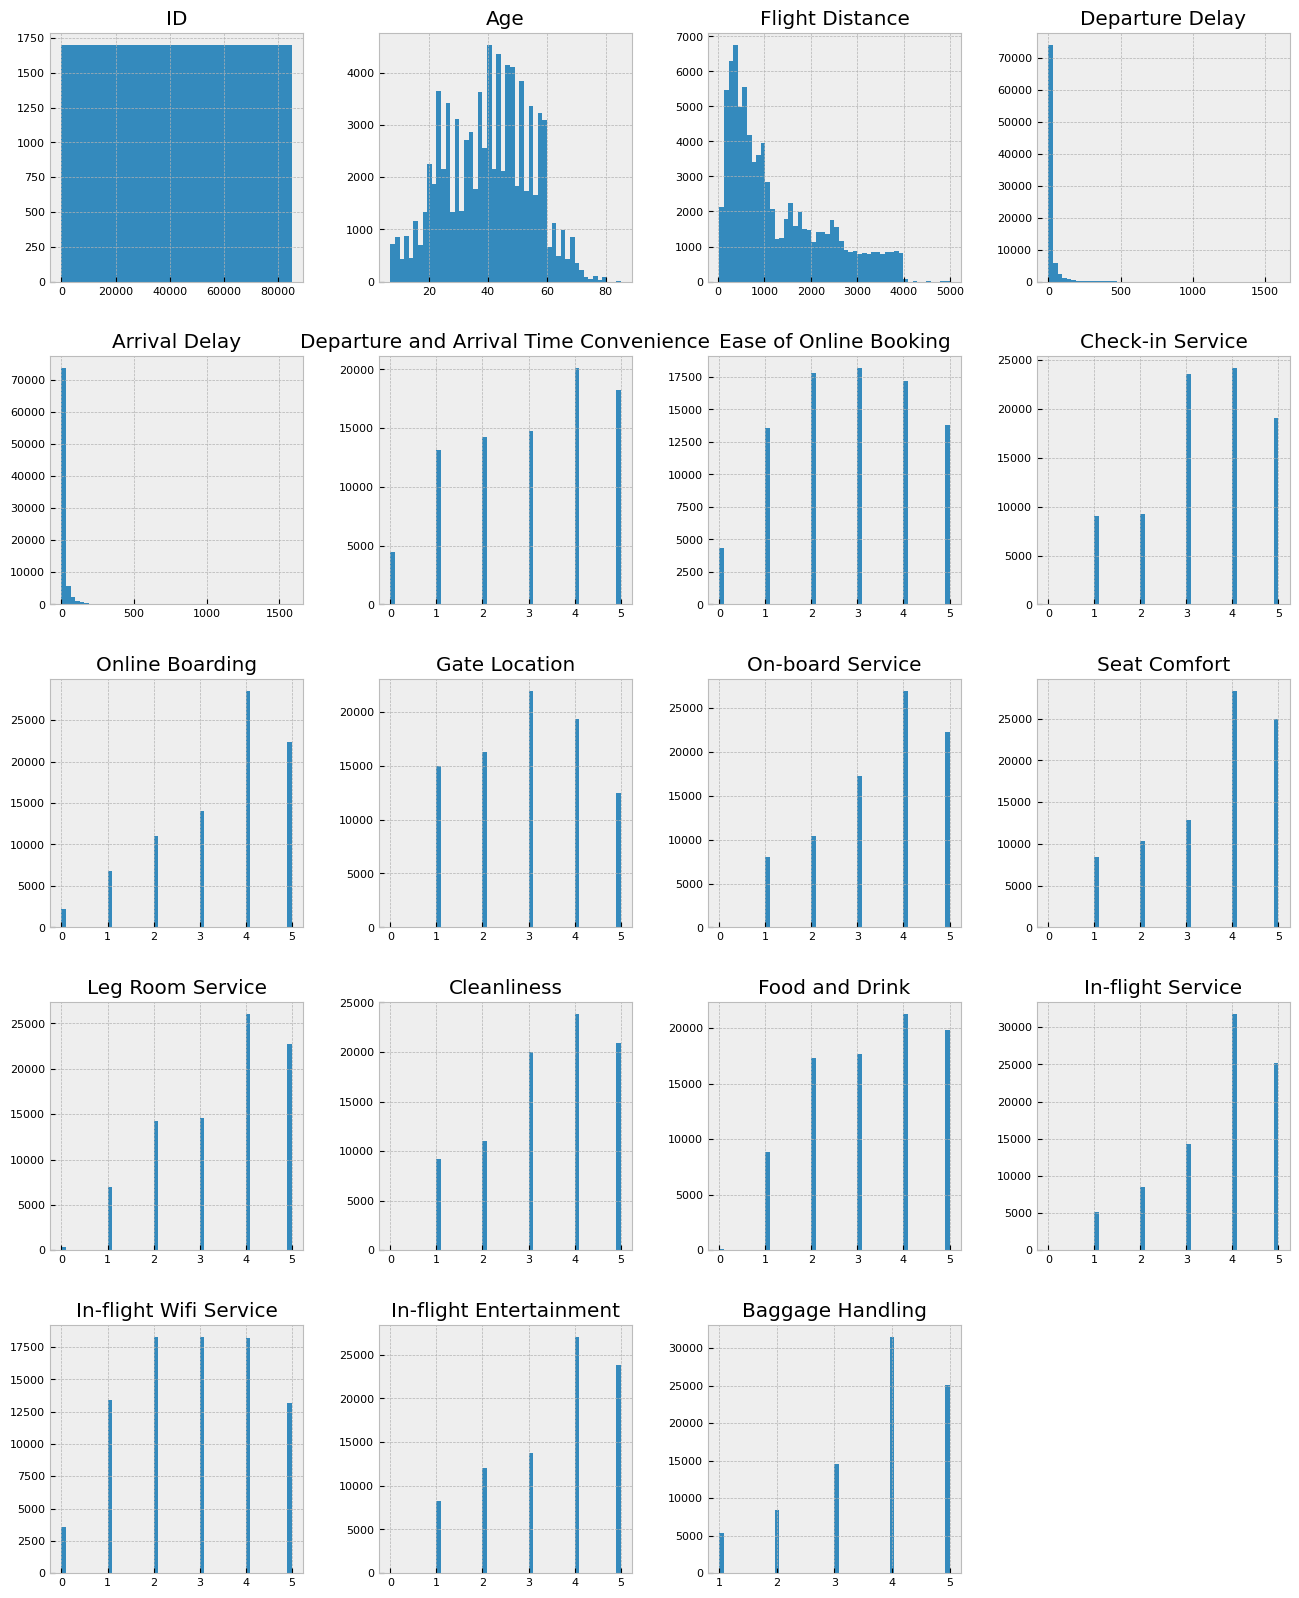

In [5]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

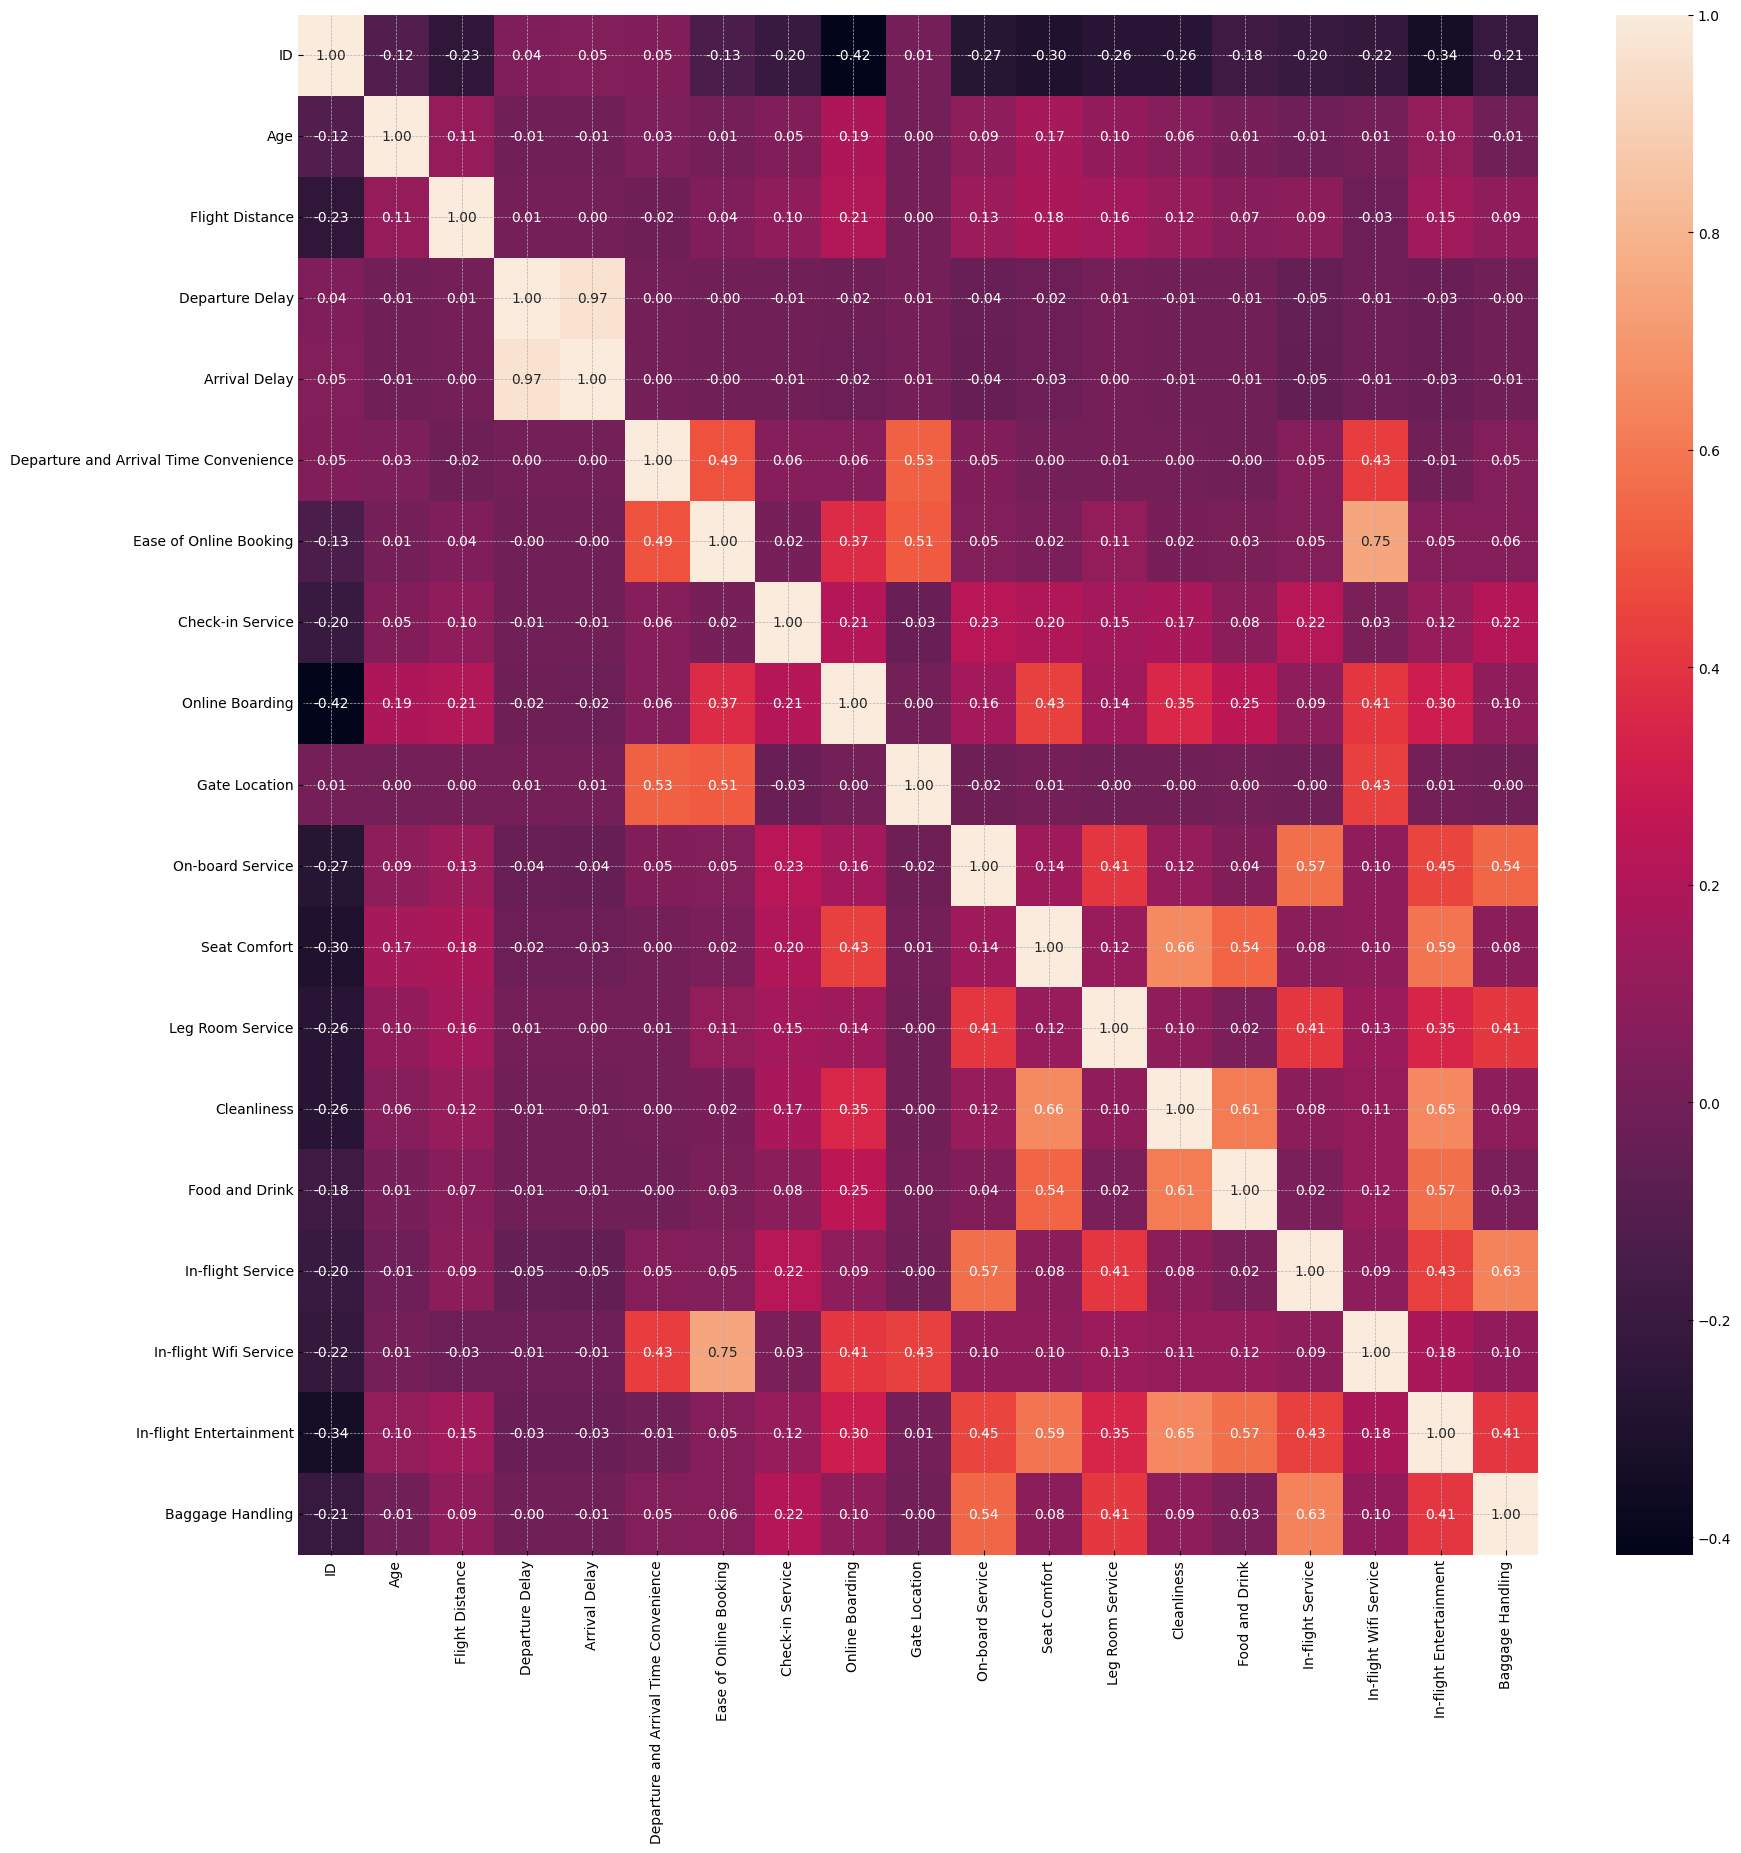

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True, fmt=".2f")

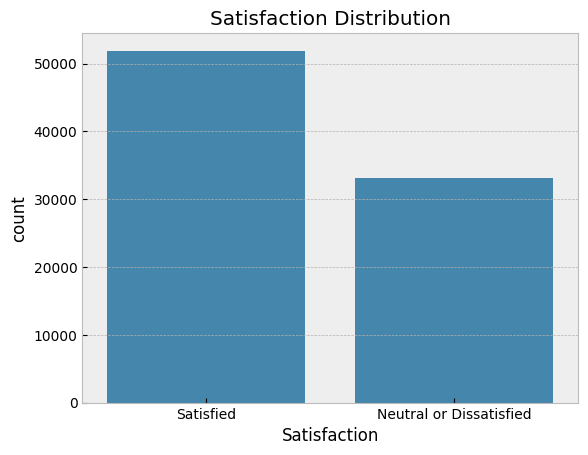

In [7]:
sns.countplot(x='Satisfaction', data=train)
plt.title('Satisfaction Distribution')
plt.show()

In [60]:
train["Arrival Delay"] = train["Arrival Delay"].fillna(train["Arrival Delay"].median())
test["Arrival Delay"] = test["Arrival Delay"].fillna(test["Arrival Delay"].median())

In [61]:
for col in cat_cols:
    values = list(train[col].unique())[::-1]
    encoding = {key: value for value, key in enumerate(values)}
    train[col] = train[col].map(encoding)
    print(encoding)

    if col == "Satisfaction":
        continue

    test[col] = test[col].map(encoding)

X, Y = train.drop("Satisfaction", axis=1), train["Satisfaction"]

{'Female': 0, 'Male': 1}
{'First-time': 0, 'Returning': 1}
{'Personal': 0, 'Business': 1}
{'Economy Plus': 0, 'Economy': 1, 'Business': 2}
{'Neutral or Dissatisfied': 0, 'Satisfied': 1}


In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X.drop(columns=["ID"]))
X_test = poly.transform(test.drop(columns=["ID"]))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


x_train, x_valid, y_train, y_valid = train_test_split(X_scaled, Y, test_size=0.20)

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
preds = lr.predict(x_valid)
print(f1_score(y_valid, preds, average="micro"))

0.9395669059668118


In [66]:
out = lr.predict(X_test_scaled)
pd.DataFrame(out).describe()

,0
count,44913.000000
mean,0.163338
std,0.369678
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
from sklearn.metrics import classification_report


# classification report for linear regression
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6677
           1       0.95      0.95      0.95     10317

    accuracy                           0.94     16994
   macro avg       0.94      0.94      0.94     16994
weighted avg       0.94      0.94      0.94     16994



In [69]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_valid)
print(f1_score(y_valid, y_pred, average="micro"))

0.9451571142756267


In [70]:
from sklearn.metrics import classification_report

# classification report for decision tree
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6677
           1       0.95      0.96      0.96     10317

    accuracy                           0.95     16994
   macro avg       0.94      0.94      0.94     16994
weighted avg       0.95      0.95      0.95     16994



In [18]:
!pip install ipywidgets


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(
    random_seed=42,
    loss_function="Logloss",
    custom_loss=['F1', 'Accuracy']
)

cb_clf.fit(
    x_train, y_train,
    eval_set=(x_valid, y_valid),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [72]:
cb_clf.best_score_["validation"]["F1"]

0.9711375212224109

In [73]:
preds = cb_clf.predict(X_test_scaled)

In [24]:
out = pd.DataFrame({"ID": test["ID"], "Satisfaction": preds})

out.describe()

,ID,Satisfaction
count,44913.000000,44913.000000
mean,107423.000000,0.139625
std,12965.410657,0.346602
min,84967.000000,0.000000
25%,96195.000000,0.000000
50%,107423.000000,0.000000
75%,118651.000000,0.000000
max,129879.000000,1.000000


In [25]:
out.to_csv("out.csv", index=False)